# Support Vector Regression

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Read Dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(len(y),1))

# Model Training

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y.reshape(1,len(y))[0])

SVR()

# Model Predicions

In [8]:
y_pred = scaler_y.inverse_transform(regressor.predict(X))

In [9]:
y_pred_single = scaler_y.inverse_transform(regressor.predict(scaler_X.transform([[6.5]])))

In [10]:
y_pred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

# Visualization

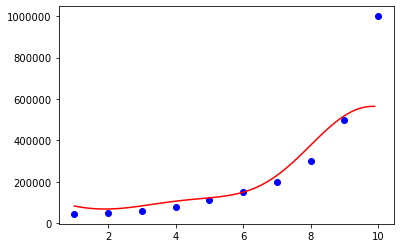

In [11]:
X_new = np.arange(min(scaler_X.inverse_transform(X))[0], max(scaler_X.inverse_transform(X))[0], 0.1)
X_new = X_new.reshape(len(X_new),1)
plt.scatter(scaler_X.inverse_transform(X),scaler_y.inverse_transform(y),color='blue')
plt.plot(X_new, scaler_y.inverse_transform(regressor.predict(scaler_X.fit_transform(X_new))), color='red')